<a href="https://colab.research.google.com/github/Chang365/ESAA-25-1-assignments/blob/main/ESAA_25_1_0411_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03 앙상블 학습
## 앙상블 학습 개요
- 앙상블 학습을 통한 분류: 여러 개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법 - 정형 데이터 분류에 사용 (ex. 랜덤 포레스트, 그래디언트 부스팅 알고리즘)
- XGBoost, LightGBM, Stacking 강세
- 앙상블 학습의 유형: 보팅, 배깅, 부스팅
(보팅: 서로 다른 알고리즘을 가진 분류기 결합/
배깅: 데이터 샘플링을 서로 다르게 가져가면서 학습 수행)








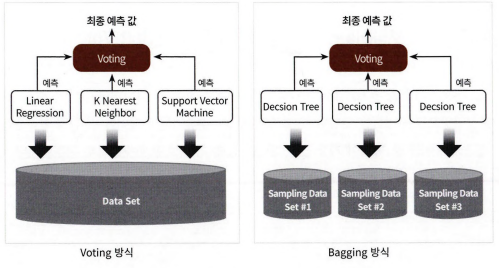

- 왼쪽: 보팅 - 선형회귀, K 최근접 아웃, 서포트 벡터 머신
- 오른쪽: 배깅 - 부트스트래핑 분할 방식, 중첩 허용
- 부스팅: 가중치 부여하면서 학습과 예측 진행 (그래디언트 부스트, XGBoost, LightGBM)
- 스태킹: 다른 모델의 예측 결괏값을 다시 학습 데이터로 만들어서 다른 모델로 재학습시켜 결과 예측

## 보팅 유형 - 하드 보팅, 소프트 보팅

- 하드 보팅: 다수결 원칙
- 소프트 보팅: 분류기들의 레이블 결정 확률의 평균 (일반적)

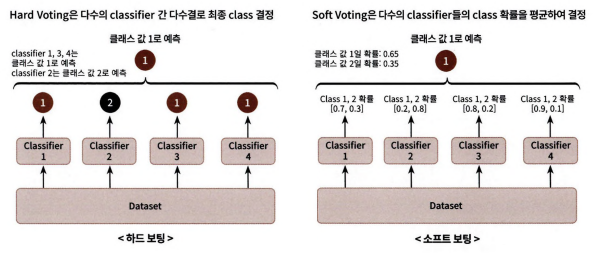

## 보팅 분류기

- VotingClassifier 지원

In [ ]:
# 위스콘신 유방암 데이터 예측 분석 (이진분류)

import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer() #자체에서 데이터 세트 생성

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- 로지스틱 회귀와 KNN을 기반으로 하여 소프트 보팅 방식으로 새롭게 보팅 분류기 만들기
- estimator: 리스트 값으로 보팅에 사용될 여러 개의 Classifier 객체들을 튜플 형식으로 입력받음
- voting: 'hard'시 하드 보팅, 'soft' 소프트 보팅 (기본은 hard0

In [ ]:
# 개별 모델은 로지스틱 회귀와 KNN임.
lr_clf = LogisticRegression(solver='liblinear')
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    test_size=0.2, random_state=156)

# VotingClassifier 학습/예측/평가.
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


- 뛰어난 예측 성능 -> 다양한 관점을 가진 알고리즘이 서로 결합해 더 나은 성능을 끌어냄
- 편향-분산 트레이드오프는 해결해야할 과제
- 배깅과 부스팅은 결정 트리 알고리즘을 기반으로 하는데 과적합이 발생할 수 있어 예측 성능이 떨어짐

# 04 랜덤 포레스트

## 랜덤 포레스트의 개요 및 실습

- 배깅: 같은 알고리즘으로 여러개의 분류기를 만들어서 보팅으로 최종 결정(알고리즘: 랜덤 포레스트)


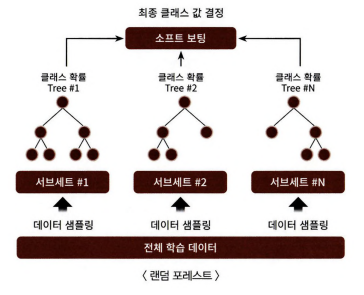

- 부트스트래핑 분할 방식: 중접되게 분리하는것
- 서브세트: 부트스트래핑으로 데이터가 임의로 만들어짐, 데이터 건수는 전체 데이터 건수와 동일하지만 개별 데이터가 중첩


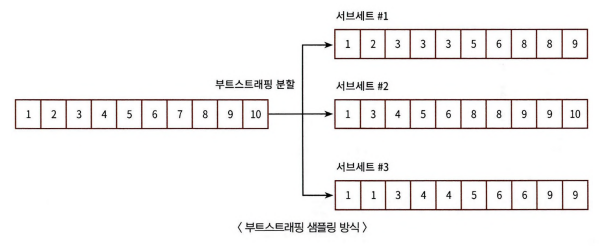

- 10개인 학습 데이터 세트에 랜덤 포레스트를 3개의 결정 트리 기반으로 학습하려고 n_estimator = 3으로 하이퍼 파라미터를 부여하면 위와 같은 서브 세트가 만들어짐
- RandomForestClassifier 지원


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

feature_name_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UCI HAR Dataset/human_activity/features.txt',sep='\s+',
                               header=None,names=['column_index','column_name'])
feature_name = feature_name_df.iloc[:, 1].values.tolist()
feature_dup_df = feature_name_df.groupby('column_name').count()

In [ ]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name',
                                                              'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                  if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [ ]:
def get_human_dataset( ):

    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UCI HAR Dataset/human_activity/features.txt',sep='\s+',
                                  header=None,names=['column_index','column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성.
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()

    # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name 적용
    X_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UCI HAR Dataset/human_activity/train/X_train.txt',sep='\s+', names=feature_name)
    X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UCI HAR Dataset/human_activity/test/X_test.txt',sep='\s+', names=feature_name)

    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
    y_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UCI HAR Dataset/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/UCI HAR Dataset/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()를 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0, max_depth=8)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9220


## 랜덤 포레스트 하이처 파라미터 및 튜닝

- n_estimators: 결정 트리 개수 지정(디포트는 10개)
- max_features: 'auto', 'sqrt'
- max_depth: 과적합을 개선하기 위한 파라미터


In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [8, 16, 24],
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
}
# RandomForestClassifier 객체 생성 후 GridSerachCV 수행
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 16, 'min_samples_leaf': 6, 'min_samples_split': 16}
최고 예측 정확도: 0.9157


In [ ]:
#별도의 데이터 세트에서 예측 성능 측정

rf_clf1 = RandomForestClassifier(n_estimators=100, min_samples_leaf=6, max_depth=16,
                                 min_samples_split=2, random_state=0)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9253


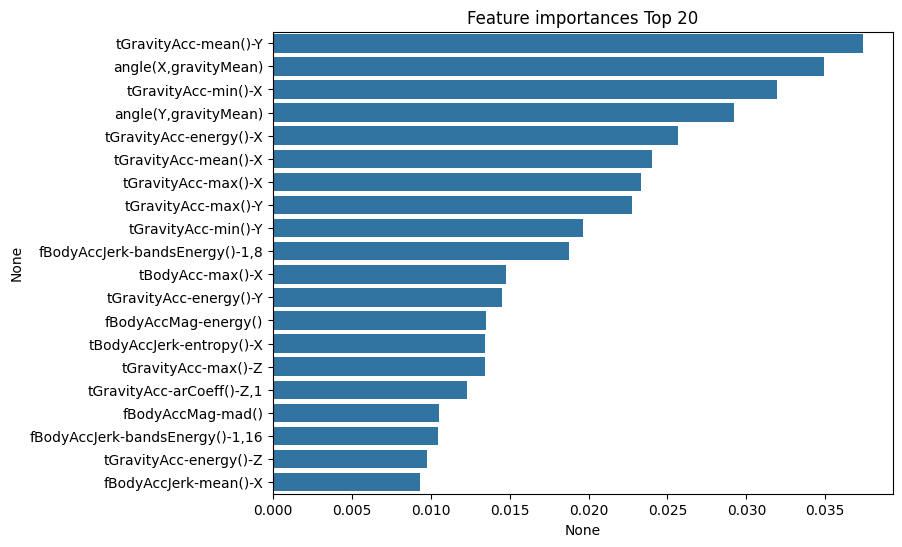

In [ ]:
# RandomForestClassifier의 feature_importances_ 속성을 이용해 알고리즘이 선택한 피처의 중요도 막대그래프 시각화

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

# 05 GBM

## GBM의 개요 및 실습

- 부스팅 알고리즘: 여러 개의 약한 학습기를 순차적으로 학습 - 예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선 (AdaBoost, 그래디언트 부스트)


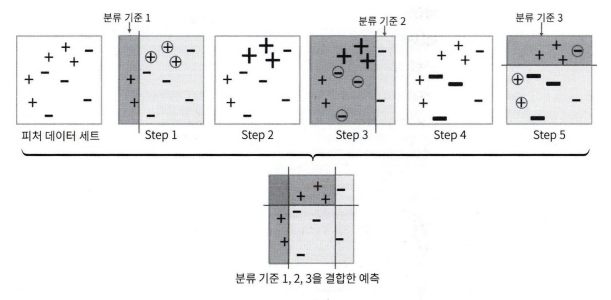

- Step 1: 분류 기준 1로 + - 분류, 동그라미 표시 데이터 -> + 오류 데이터
- Step 2: + 오류 데이터 가중치 값 부여
- Step 3: 분류 기준 2로 + - 분류. 동그라미 표시 데이터 -> - 오류 데이터
- Step 4: - 오류 데이터 더 큰 가중치 값 부여
- Step 5: 학습기가 순차적으로 오류 값 가중치 부여한 기준 결합해 예측 수행

- GBM: 가중치 업데이트를 경사 하강법을 이용
- 경사하강법: 반복수행을 통해 오류를 최소화할 수 있도록 가중치 업데이트 값을 도출하는 기법
- GradientBoostingClassifier 제공

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))

GBM 정확도: 0.9379
GBM 수행 시간: 1273.3 초 


- 일반적으로 GBM이 랜덤 포레스트보다 나은 예측 성능 But 시간 오래 걸리고 하이퍼 파라미터 튜닝 노력 더 필요

## GBM 하이퍼 파라미터 소개

- loss: 경사 하강법에서 사용할 비용 함수 지정 (기본값 deviance)
- learninf_ rate: GBM이 학습을 진행할 때마다 적용하는 학습률(기본값 0.1)
- n_estimator: weak learner의 개수(기본값 100)
- subsample: weak learner가 학습에 사용하는 데이터 샘플링 비율(기본값 1)

# 06 XGBoost

## XGBoost 개요

- GBM에 기반하고 있지만 더 빠르고 과적합 규제 부재들의 문제 해결, 병렬 CPU 환경에서 병렬학습 가능

1. 뛰어난 예측 성능
2. GBM 대비 빠른 수행 시간
3. 과적합 규제(Regularization)
4. Tree pruning(나무 가지치기)
5. 자체 내장된 교차 검증
6. 결손값 자체 처리

- 파이썬 래퍼 XGboost 모듈, 사이킷런과 연동되는 모듈은 사이킷런 래퍼 XGBoost 모듈이라고 지칭

## XGBoost 설치하기

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

## 파이썬 래퍼 XGBoost 하이퍼 파라미터

- 일반 파라미터 : 일반적으로 실행 시 스레드의 개수나 silent 모드 등의 선택을 위한 파라미터, 디폴트 값을 바꾸는 경우 거의 X

- 부스터 파라미터 : 트리 최적화, 부스팅, regularization 등과 관련 파라미터 등을 지칭 (대부분의 파라미터)

- 학습 태스크 파라미터 : 학습 수행 시의 객체 함수, 평가를 위한 지표 등을 설정하는 파라미터

#주요 일반 파라미터
- booster: gbtree(디폴트), gbliner 선택
- silent: 디폴트는 0이며, 출력 메세지를 나타내고 싶지 않은 경우 1
- nthread: CPU의 실행 스래드 개수 조정, 디폴드는 전체 스레드 다 사용

#주요 부스터 파라미터
- eta[default=0.3, alias: learning_rate]
- num_boost_rounds
- min_child_weight[default=1]
- gamma[default-0, alias:min_split_loss]
- max_depth[default=6]
- sub_sample[default=1]
- colsample_bytree[default=1]
- lambda[default=1. alias:reg_lambda]
- alpha[default=0, alias:reg_alpha]
- scale_pos_weight[default=1]

#학습 태스크 파라미터

- objective : 최솟값을 가져야 할 손실 함수 정의
- binary:logistic : 이진 분류일 때 적용
- multi:softmax : 다중 분류일 때 적용
- multi:softprob : multi:softmax와 유사, 예측 확률을 반환
- eval_metric : 검증에 사용되는 함수를 정의

- 과적합 문제가 심각하다면: eta 값 낮추기, max_depth 값 낮추기, min_child_weight 값 높이기, gamma 값 높임

In [ ]:
pip install xgboost==1.5.1

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
import xgboost

print(xgboost.__version__)

1.5.1


## 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측


In [ ]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
features = dataset.data
labels = dataset.target
cancer_df = pd.DataFrame(data=features, columns=dataset.feature_names)
cancer_df['target'] = labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [ ]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [ ]:
# cancer_df에서 feature용 DataFrame과 Label용 Series 객체 추출
# 맨 마지막 칼럼이 Label임. Feature용 DataFrame은 cancer_df의 첫번째 칼럼에서 맨 마지막 두번째 칼럼까지를 :-1 슬라이싱으로 추출
X_features = cancer_df.iloc[:,:-1]
y_label = cancer_df.iloc[:,-1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


In [ ]:
# 만약 구버전 XGBoost에서 DataFrame으로 DMatrix 생성이 안될 경우 X_train.values로 넘파이 변환.
# 학습, 검증, 테스트용 DMatrix를 생성
dtr = xgb.DMatrix(data=X_tr.values, label=y_tr.values)
dval = xgb.DMatrix(data=X_val.values, label=y_val.values)
dtest = xgb.DMatrix(data=X_test.values, label=y_test.values)

In [ ]:
params = { 'max_depth':3,
          'eta':0.5,
           'objective':'binary:logistic',
           'eval_metric':'logloss'
           }
num_rounds = 400

- max_depth는 3
- 학습률 eta는 0.1
- 예제 데이터가 0또는 1 이진 분류이므로 목적함수는 이진 로지스틱
- 오류 함수의 평가 성능 지표는 logloss
-  num_rounds는 400회

In [ ]:
# 학습 데이터 셋은 'train' 또는 평가 데이터 셋은 'eval'로 명기함
eval_list = [(dtr,'train'), (dval,'eval')]

# 하이퍼 파라미터와 early stopping 파라미터를 train()함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtr, num_boost_round=num_rounds,\
                      early_stopping_rounds=50, evals=eval_list)


[0]	train-logloss:0.35554	eval-logloss:0.45915
[1]	train-logloss:0.21879	eval-logloss:0.35750
[2]	train-logloss:0.14308	eval-logloss:0.30244
[3]	train-logloss:0.10146	eval-logloss:0.27501
[4]	train-logloss:0.07421	eval-logloss:0.26152
[5]	train-logloss:0.05751	eval-logloss:0.26290
[6]	train-logloss:0.04717	eval-logloss:0.27088
[7]	train-logloss:0.03729	eval-logloss:0.27125
[8]	train-logloss:0.03133	eval-logloss:0.29146
[9]	train-logloss:0.02748	eval-logloss:0.29061
[10]	train-logloss:0.02375	eval-logloss:0.29161
[11]	train-logloss:0.02058	eval-logloss:0.29964
[12]	train-logloss:0.01792	eval-logloss:0.27732
[13]	train-logloss:0.01636	eval-logloss:0.27806
[14]	train-logloss:0.01472	eval-logloss:0.27727
[15]	train-logloss:0.01350	eval-logloss:0.26936
[16]	train-logloss:0.01233	eval-logloss:0.26380
[17]	train-logloss:0.01144	eval-logloss:0.26799
[18]	train-logloss:0.01114	eval-logloss:0.26521
[19]	train-logloss:0.01026	eval-logloss:0.26545
[20]	train-logloss:0.00966	eval-logloss:0.25249
[2

- train() 으로 학습을 수행하면서 반복시마다 train-logloss 와 eval-logloss가 지속적으로 감소
- 176번째 반복에서 완료
- 126번째가 제일 낮음


In [ ]:
# 테스트 데이터 세트에 예측을 수행

pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 테스트 데이터 세트에 예측을 수행

pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5보다 크다면 1, 그렇지 않다면 0으로 예측값 결정하여 List 객체인 preds에 저장
preds = [ 1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.982 0.005 0.6   0.008 0.989 1.    1.    1.    0.999 0.   ]
predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.982 0.005 0.6   0.008 0.989 1.    1.    1.    0.999 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    # ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)

    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, \
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740,     F1: 0.9677, AUC:0.9930


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

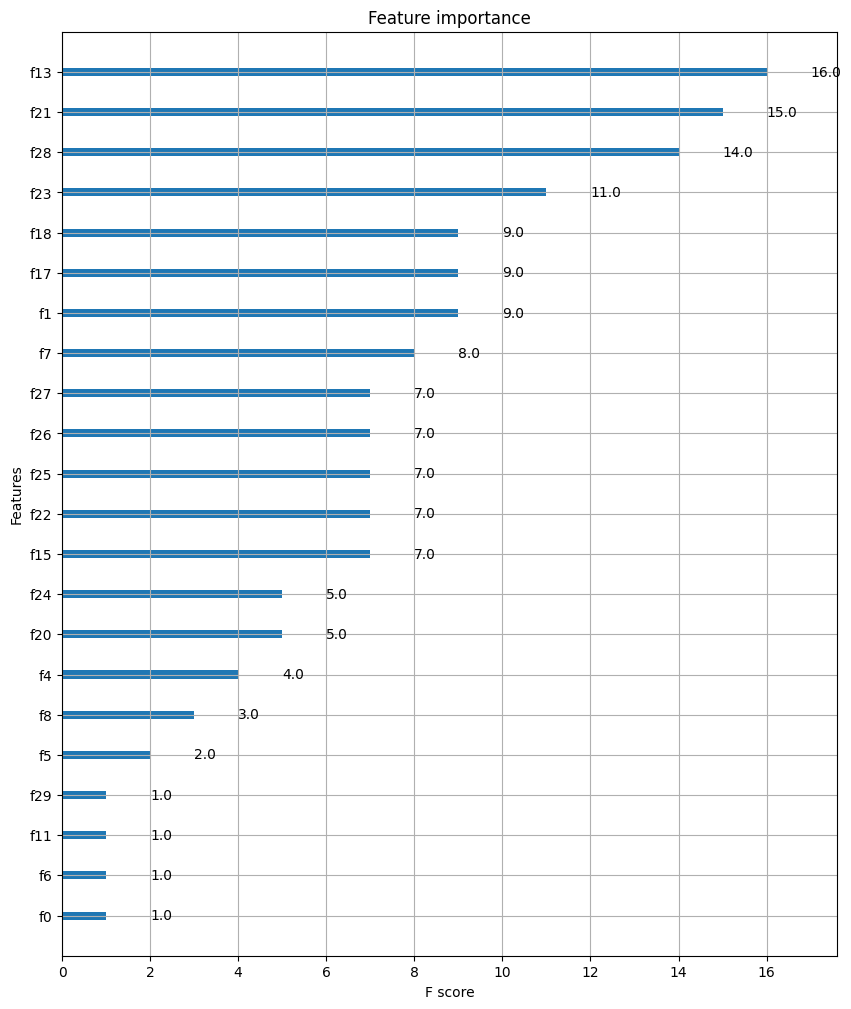

In [ ]:
# 시각화

import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

## 사이킷런 래퍼 XGBoost의 개요 및 적용

- eta -> learning_rate
- sub_sample -> subsample
- lambda -> reg_lambda
- alpha -> reg_alpha

In [ ]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifer 임포트
from xgboost import XGBClassifier

# Warning 메시지를 없애기 위해 eval_metric 값을 XGBClassifier 생성 인자로 입력
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, eval_metric='logloss')

xgb_wrapper.fit(X_train, y_train, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]


In [ ]:
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,     F1: 0.9744, AUC:0.9954


- XGBoost 보다 더 좋은 평가 결과 -> 위스콘신 데이터 세트 개수가 워낙 작은데, 조기 중단을 위해서 최초 학습 데이터인 X_train을 다시 학습용 X_tr, X_val로 분리하면서 최종 학습 데이터 건수가 작아지기 때문에 발생한 것으로 추정

In [ ]:
# 조기 중단을 수행, fit()

from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)
evals = [(X_tr.values, y_tr.values), (X_val.values, y_val.values)]
xgb_wrapper.fit(X_tr.values, y_tr.values, early_stopping_rounds=50, eval_metric="logloss", eval_set=evals, verbose=True)

ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52929
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31893	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

- 176번째 반복에서 학습 마무리
- 0.25587로 가장 낮고, 이후 50번 반복까지 더 이상 성능 향상되지 않음

In [ ]:
# 조기중단으로 학습된 XGBClassifier 의 예측 성능

get_clf_eval(y_test, ws50_preds, ws50_pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740,     F1: 0.9677, AUC:0.9933


- 조기중단 값을 너무 급격하게 줄이면 예측 성능 저하

In [ ]:
# early_stopping_rounds를 10으로 설정하고 재학습.
xgb_wrapper.fit(X_tr.values, y_tr.values, early_stopping_rounds=10, eval_metric="logloss", eval_set=evals, verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52929
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31893	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

- 103번쨰 반복 후 학습 종류

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

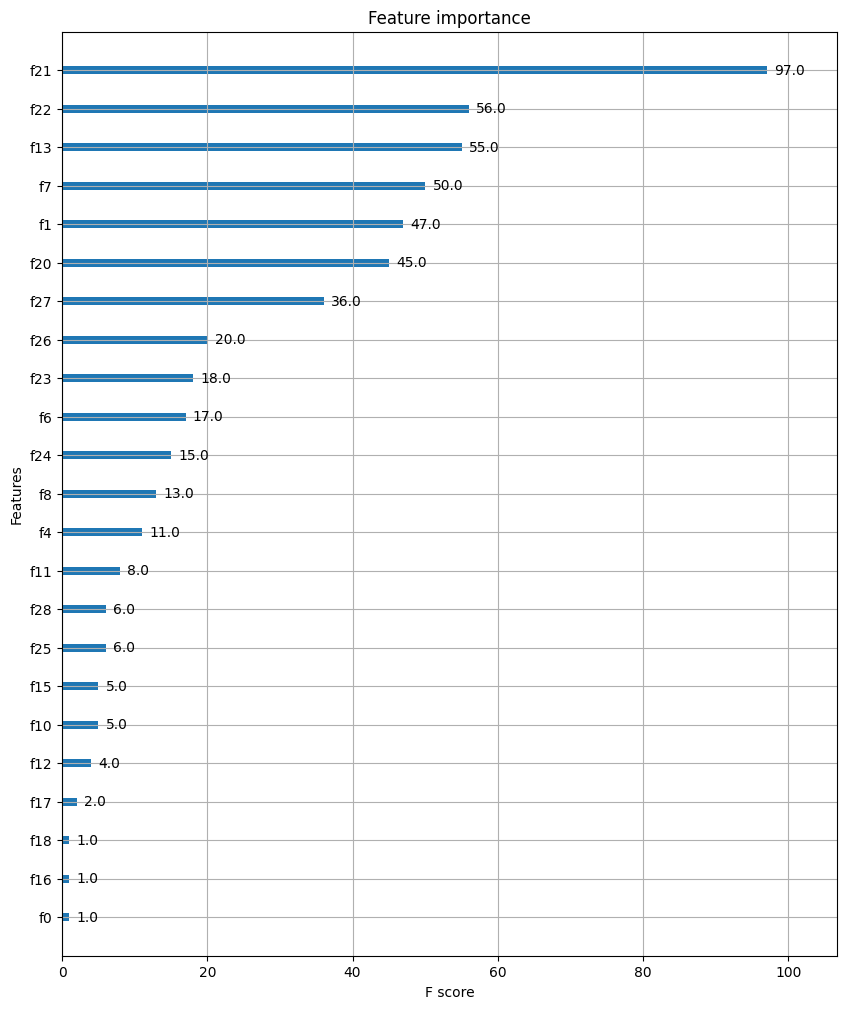

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
# 사이킷런 래퍼 클래스를 입력해도 무방.
plot_importance(xgb_wrapper, ax=ax)